In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [3]:
dt = pd.read_csv('obese.csv')
dt.head()

,Type,junk_food,Healthy_food,Bevarages,Sleep
0,obese,25,45,20,10
1,obese,10,60,15,15
2,obese,40,40,10,10
3,obese,15,50,15,20
4,obese,20,45,25,10


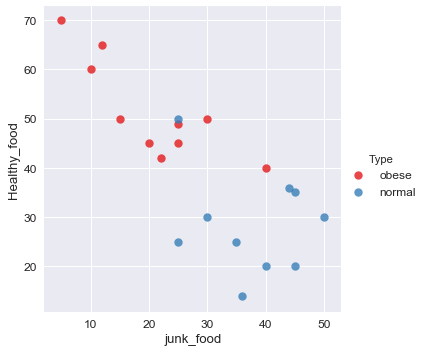

In [5]:
sns.lmplot('junk_food', 'Healthy_food', data=dt, hue='Type',
 palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
character = dt[['junk_food','Healthy_food']].as_matrix()
type_label = np.where(dt['Type']=='obese', 0, 1)

C:\anconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
model = svm.SVC(kernel='linear')
model.fit(character, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

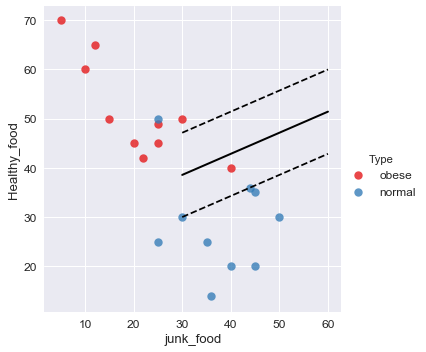

In [10]:
sns.lmplot('junk_food', 'Healthy_food', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
 s=80, facecolors='none');

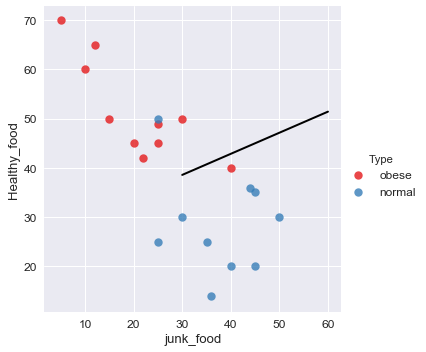

In [12]:
sns.lmplot('junk_food', 'Healthy_food', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [13]:
def predict_health(junk_food, Healthy_food):
    if(model.predict([[junk_food, Healthy_food]]))==0:
        print('Take care...You are not healthy')
    else:
        print('No Worry....You are completly fit')

In [14]:
predict_health(25,25)

No Worry....You are completly fit
